\newpage

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

## Question 1
Consider the diabetes dataset available on Kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

The goal is to develop a classification model to predict whether a patient has diabetes based on their diagnostic measurements. Additionally, the project will analyze and interpret the logistic regression model to understand its findings.

In [2]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(url)
# General view of the data frame:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.shape
# There are 303 records and 13 features in the data frame. 
# The response variable is num, which will be transformed to binary in the analysis.

(303, 14)

## Q1(1) Classification Problem: 
The goal is to use medical and personal information (such as age, sex, cholesterol levels, and chest pain type) to predict whether a person has heart disease. Each row in the dataset represents a different patient, and the final column shows if the patient was diagnosed with heart disease. By analyzing these features, we will train a model to classify future patients as either having heart disease or not.

## Q1(2) Whether the data transformation is needed or not:

In [4]:
# check the data type of the response variable in the data
df.num.dtype

dtype('int64')

Since num is a numerical variable but represents categories, it should be converted to a categorical type.

In [5]:
df['num'] = df['num'].astype('category')

## Q1(3) Detailed Description:

In [6]:
df.drop('num', axis=1).describe()
# column 2 sex: 1 = male; 0 = female.
# column 3 cp: chest pain type (0,1,2,3,4)
# column 4 trestbps: resting blood pressure (in mm Hg)
# column 5 chol: serum cholesterol in mg/dl
# column 8 thalach: maximum heart rate achieved

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


This heart disease dataset includes 303 patients and 13 clinical variables. The average age is approximately 54.4 years, ranging from 29 to 77. The majority of patients are male (around 68%). 

Most patients reported chest pain types around category 3, with a maximum value of 4.

Resting blood pressure (trestbps) has an average of 131.7 mm Hg, while serum cholesterol (chol) averages 246.7 mg/dl, reaching up to 564 mg/dl. 

The thalach variable (maximum heart rate achieved) ranges from 71 to 202, with a mean of about 149.6.

## Q1(4)  Transform the response num into a binary outcome (1 for original 1,2,3,4 and 0 for original 0):

In [7]:
# Github Coplite is used to ransform the response variable into binary outcome.
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
y = df['num']  # Update the response variable

## Q1(5) Analyze relationships between variables:

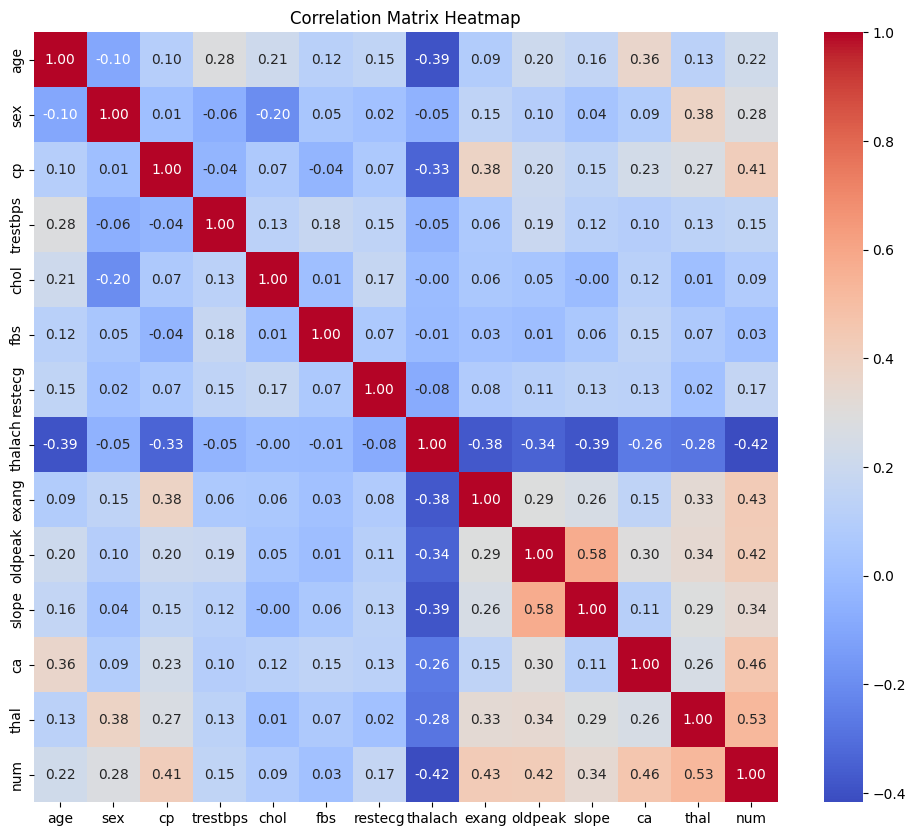

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

The variable thalach, which measures the maximum heart rate achieved during exercise, shows a moderate negative correlation with variable age (−0.39). This indicates that younger patients tend to reach higher heart rates. 

For another, the variable oldpeak (which measures ST depression during exercise) has a correlation of 0.58 with variable slope (which describes the shape of the ST segment, 1 for upsloping, 2 for flat, and 3 for downsloping). This means that higher ST depression is often associated with flatter or downsloping ST segments, which may be linked to a higher risk of heart problems. 

## Q1(6) Drop the rows with the missing values:

In [9]:
# Drop rows with missing values
X_noNA = df.dropna()
# Predictors
X = X_noNA.drop(columns=['num'])
# Response Variable
y = X_noNA.num

# Number of observations after dropping missing values
num_observations = X.shape[0]
num_observations


297

There are 297 osbervations after dropping the missing values.

## Q1(11)

Train the Logistic Regression Classifier: 

In [ ]:
#Copilot is used for assistance
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_model = LogisticRegression(max_iter=100)
grid_search = GridSearchCV(
    log_model, 
    param_grid, 
    cv=5, 
    scoring='accuracy'
    )
grid_search.fit(X_train, y_train)

# Get the best parameter
best_C = grid_search.best_params_['C']
print("Optimal C value:", best_C)
best_score = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_score)

# Train the logistic regression model with best C
best_log_model = LogisticRegression(max_iter=200, C=best_C)
best_log_model.fit(X_train, y_train)

Optimal C value: 0.1
Best Cross-Validation Accuracy: 0.8552845528455284


LogisticRegression(C=0.1, max_iter=200)

Train the Classification Tree Classifier:

In [ ]:
# perform cross-validation to select the optimal tree depth (for Classification Tree Model):
depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    dt = DecisionTreeClassifier(
        criterion='gini', # growing tree based on gini index
        random_state=0, 
        max_depth=k
        )
    
    # 5-fold cross-validation using accuracy 
    cv_scores_k = cross_val_score(
        dt,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'  
    )
    
    cv_scores.append(np.mean(cv_scores_k))

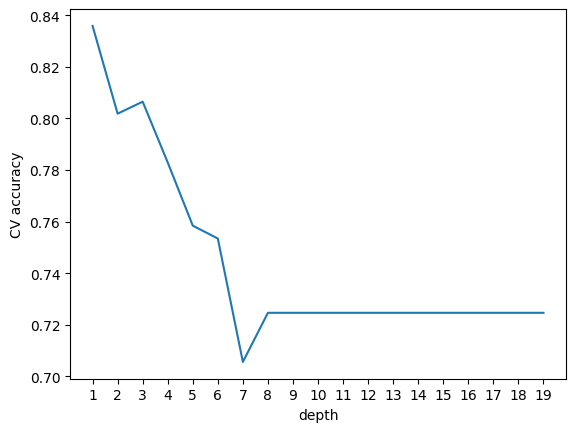

In [ ]:
plt.plot(depth_range, cv_scores)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))
plt.show()

In [ ]:
optimal_depth_index = np.argmax(cv_scores)
optimal_depth = depth_range[optimal_depth_index]
print("Optimal max_depth: ", optimal_depth)

Optimal max_depth:  1


In [ ]:
# train the final model using the optimal depth and evaluate it on the test data, which is 1.
dt_best = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 1, 
    random_state=0
    ) 
dt_best.fit(X_train, y_train)
test_accuracy = dt_best.score(X_test, y_test)
print(round(test_accuracy,5))

0.82222
